In this notebook (which I wrote as a side-experiment to the Coursera class [Fundamentals of waves and vibrations](https://www.coursera.org/learn/fundamentals-waves-vibrations)), I investigate one-dimensional wave propagation and in particular the dispersion phenomenon.

# Non-dispersive 1D waves 

Let's start with non-dispersive 1D waves. A simple object that allows us to do some nice computations is the harmonic wave. Quite simply put, an harmonic wave has a spatial pattern, which is due to its spatial phase and in particular its *wavenumber* k and a temporal pattern, due to its *pulsation* omega.

We start by defining the spatial pattern, a sort of phase map (as I described it in [this previous blog article](http://flothesof.github.io/monopole-dipole-quadrupole.html)).

In [1]:
import numpy as np

x = np.linspace(-5, 5, num=200)
k = 2 * np.pi / 1
phase = np.exp(1j * k * x)

If we add the time oscillation to the phase map, we get a propagating wave, which we can animate using `holoviews`:

In [2]:
import holoviews as hv
hv.extension('matplotlib', logo=False)

hv.opts.defaults(hv.opts.Curve(fig_inches=6, aspect=1.5))
hv.opts.defaults(hv.opts.Overlay(fig_inches=6, aspect=1.5))

omega = k * 1.
T = 2 * np.pi / omega
N = 15

In [3]:
%%output holomap='scrubber'
hmap1 = hv.HoloMap({i: hv.Curve((x, np.real(phase * np.exp(-1j * omega * i / N * T))), 
                                   label='plane wave') for i in range(N)})
hmap1

:HoloMap   [Default]
   :Curve   [x]   (y)

With this simple relationship, we see a wave that propagates from left to right.

# Two plane waves 

A first interesting pattern that we can obtain using this harmonic wave toolkit is what happens when two plane waves propagate in the same medium, each with the same speed, but going in opposite directions. 

The wave going in the opposite direction is defined by the following phase map:

In [4]:
phase_opposite = np.exp(-1j * k * x)

Which we can animate:

In [5]:
%%output holomap='scrubber'
hmap2 = hv.HoloMap({i: hv.Curve((x, np.real(phase_opposite * np.exp(-1j * omega * i / N * T))),
                                   label='plane wave -x') for i in range(N)})
hmap2

:HoloMap   [Default]
   :Curve   [x]   (y)

We can guess what will happen if we superpose both waves on the same plot:

In [6]:
%%output holomap='scrubber'
hmap3 = (hmap1 * hmap2).opts(show_legend=False)
hmap3

:HoloMap   [Default]
   :Overlay
      .Curve.Plane_wave                :Curve   [x]   (y)
      .Curve.Plane_wave_hyphen_minus_x :Curve   [x]   (y)

The waves interfere, sometimes adding up and sometimes destroying each other, which we can highlight with some snapshots of the above animation:

:Layout
   .Overlay.I  :Overlay
      .Curve.Plane_wave                :Curve   [x]   (y)
      .Curve.Plane_wave_hyphen_minus_x :Curve   [x]   (y)
   .Overlay.II :Overlay
      .Curve.Plane_wave                :Curve   [x]   (y)
      .Curve.Plane_wave_hyphen_minus_x :Curve   [x]   (y)
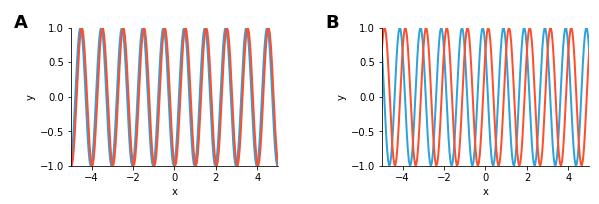

In [7]:
hmap3[7] + hmap3[13]

Since waves add up in reality, the resulting wave will look as follows:

In [8]:
%%output holomap='scrubber'
hmap4 = hv.HoloMap({i: hv.Curve((x, np.real((phase + phase_opposite) * np.exp(-1j * omega * i / N * T))),
                                   label='two plane waves -x +x ') for i in range(N)})
hmap4

:HoloMap   [Default]
   :Curve   [x]   (y)

We see a dynamical destruction and amplification of the two waves, a so-called *standing wave*.

# Group velocity 

The above were animated using constant phase velocity. Some of the most interesting waves are those that exist in dispersive media. This means that waves of different wavelengths can propagate at different velocities.

A simple example to understand what happens is to plot the motion of two waves going in the same direction (not opposite ones as above) but at different speeds.

Here, we use a so-called dispersion relation, which relates the speed of waves at different frequencies such as the one observed for [water waves in deep waters](https://en.wikipedia.org/wiki/Dispersion_(water_waves)) (the group velocity is half the phase velocity).

In [9]:
N = 5

In [10]:
cphi = 2.
k1 = 2 * np.pi / 1.
w1 = k1 * cphi
k2 = k1 + np.pi
w2 = w1 + .5 * cphi * (k2 - k1)

phase_k1 = np.exp(1j * k1 * x)
phase_k2 = np.exp(1j * k2 * x)

T1 = 2 * np.pi / w1
T2 = 2 * np.pi / w2

In [11]:
%%output holomap='scrubber'
hmap5 = hv.HoloMap({i: hv.Curve((x, np.real(phase_k1 * np.exp(-1j * w1 * i / N * T1) + \
                                            phase_k2 * np.exp(-1j * w2 * i / N * T1))),
                                            label='two waves travelling at different speeds') for i in range(8 * N)})
hmap5

:HoloMap   [Default]
   :Curve   [x]   (y)

What is interesting here is that the shape of the resulting wave deforms in complicated way while moving from place to place. This is what is called dispersive propagation. However, there is still a way of describing this propagation in terms of things that don't change shape so much.

In this case, since we are summing cosine waves, we have an exact formula describing this propagation.


$$
\cos(kx - \omega t) + cos \left( (k + \delta k) x - (\omega + \delta \omega) t \right) =  2 \cos \left ( (k + \frac{\delta k}{2}) x - (\omega + \frac{\delta \omega}{2}) t \right ) cos(\frac{\delta k}{2} x - \frac{\delta \omega}{2} t) 
$$

In the above formula, there is a wave of approximately the same propagation properties that gets multiplied by an envelope that propagates at a slower speed than the carrier frequency (again, this is naturally found in the case of water waves in deep waters).

To see things more clearly, we can plot the two components as separated entities, as a *carrier* and an *envelope*.

In [12]:
phase_carrier = np.exp(1j * (k1 + (k2 - k1)/2) * x)
phase_envelope = 2 * np.exp(1j * (k2 - k1)/2 * x)

In [13]:
%%output holomap='scrubber' 
%%opts Overlay [show_legend=False]
hmap6 = hv.HoloMap({i: hv.Curve((x, np.real(phase_carrier * np.exp(-1j * (w1 + (w2 - w1) / 2) * i / N * T1))),
                                   label='carrier').opts(alpha=0.2) * \
                       hv.Curve((x, np.real(phase_envelope * np.exp(-1j * ((w2 - w1) / 2) * i / N * T1))),
                                   label='envelope') for i in range(8 * N)})
hmap6

:HoloMap   [Default]
   :Overlay
      .Curve.Carrier  :Curve   [x]   (y)
      .Curve.Envelope :Curve   [x]   (y)

As we can see, the carrier is twice as fast as the envelope, which is the case for dispersive deep water waves.

What happens if we overlay the envelope and the carrier on top of the complicated wave that we had above?

In [14]:
%%output holomap='scrubber' 
%%opts Overlay [show_legend=False]
hmap5 * hmap6

:HoloMap   [Default]
   :Overlay
      .Curve.Two_waves_travelling_at_different_speeds :Curve   [x]   (y)
      .Curve.Carrier                                  :Curve   [x]   (y)
      .Curve.Envelope                                 :Curve   [x]   (y)

The superposition lets the underlying structure of the complicated wave appear! The complicated pattern can be described by an envelope that propagates at slower speeds than the faster oscillations of the wave. This description can be very useful for many applications of dispersive waves, for instance guided waves in fiber optics, structures or at the surface of the sea. 

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20190204_beatsGroupVelocity.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20190204_beatsGroupVelocity.ipynb).*